<a href="https://colab.research.google.com/github/ahmedabdurahim/Machine-learning/blob/main/StockPricePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [158]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [159]:
df = web.DataReader('SPY', data_source = 'yahoo', start = '2000-01-01', end = '2022-10-30')
#show the data

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.250000,143.875000,148.250000,145.437500,8164300.0,95.746445
2000-01-04,144.062500,139.640625,143.531250,139.750000,8089800.0,92.002174
2000-01-05,141.531250,137.250000,139.937500,140.000000,12177900.0,92.166801
2000-01-06,141.500000,137.750000,139.625000,137.750000,6227200.0,90.685509
2000-01-07,145.750000,140.062500,140.312500,145.750000,8066500.0,95.952225
...,...,...,...,...,...,...
2022-10-24,380.059998,373.109985,375.890015,378.869995,85436900.0,378.869995
2022-10-25,385.250000,378.670013,378.790009,384.920013,78846300.0,384.920013
2022-10-26,387.579987,381.350006,381.619995,382.019989,104087300.0,382.019989


In [160]:
df.shape

(5744, 6)

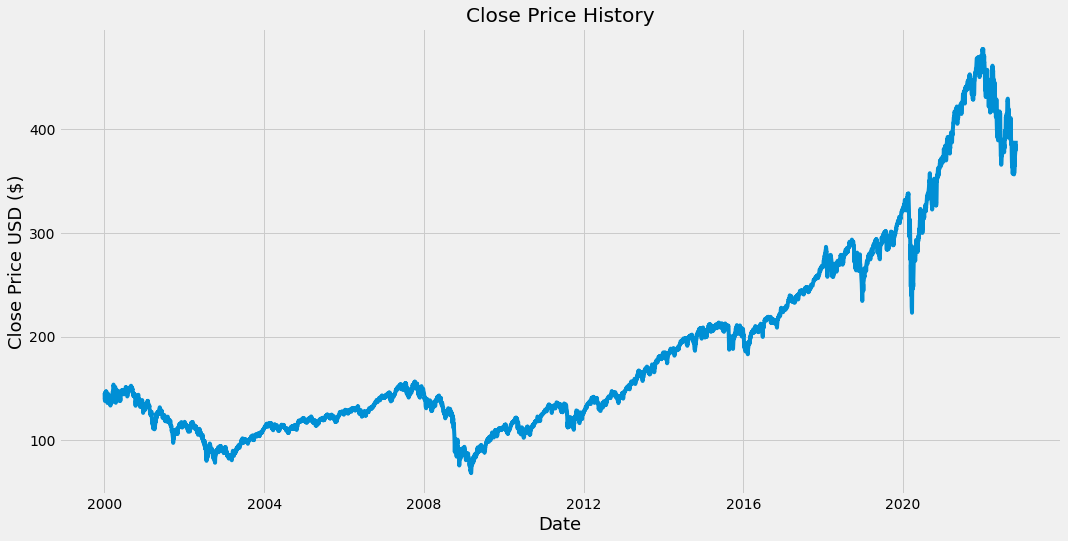

In [161]:
#Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [162]:
# New DataFrame with only Close column
data = df.filter(['Close'])
#Convert the datafram to a numpy array
dataset = data.values
#Get no of rows to train model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

4596

In [163]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.18878784],
       [0.17490235],
       [0.1755127 ],
       ...,
       [0.76638182],
       [0.76140141],
       [0.78347167]])

In [164]:
#Create training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data to x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if(i<=61):
    print(x_train)
    print(y_train)
    print()

[array([0.18878784, 0.17490235, 0.1755127 , 0.17001953, 0.18955078,
       0.19077149, 0.18649903, 0.1829895 , 0.18771973, 0.19252625,
       0.18970337, 0.19260254, 0.18710938, 0.18634644, 0.17635193,
       0.18024292, 0.17749634, 0.17612305, 0.1654419 , 0.17444458,
       0.17780152, 0.17810669, 0.18329468, 0.1818451 , 0.18131104,
       0.18604126, 0.17864075, 0.1793274 , 0.17230835, 0.17429199,
       0.17814484, 0.17307129, 0.17131653, 0.16406861, 0.16322937,
       0.16712036, 0.1604065 , 0.15922394, 0.16605225, 0.16925659,
       0.171698  , 0.17192688, 0.17825928, 0.17490235, 0.16830292,
       0.1678833 , 0.17764893, 0.17581787, 0.17207947, 0.16727295,
       0.17505493, 0.19100037, 0.19244995, 0.1906189 , 0.19794312,
       0.20015564, 0.20641175, 0.20862427, 0.20465699, 0.20252075])]
[0.20290222472478955]

[array([0.18878784, 0.17490235, 0.1755127 , 0.17001953, 0.18955078,
       0.19077149, 0.18649903, 0.1829895 , 0.18771973, 0.19252625,
       0.18970337, 0.19260254, 0.18

In [165]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [166]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4536, 60, 1)

In [167]:
#Build the Lstm Model

model = Sequential()
model.add(LSTM (50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [168]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [169]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
4536/4536 [==============================] - 145s 31ms/step - loss: 2.0398e-04
Epoch 2/5
4536/4536 [==============================] - 127s 28ms/step - loss: 9.3412e-05
Epoch 3/5
4536/4536 [==============================] - 127s 28ms/step - loss: 5.7427e-05
Epoch 4/5
4536/4536 [==============================] - 128s 28ms/step - loss: 5.6070e-05
Epoch 5/5
4536/4536 [==============================] - 126s 28ms/step - loss: 4.8878e-05


In [170]:
#Create testing dataset
#Create new array containing scaled values from index 2104 to 2705
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [171]:
#Convert data to a numpy array
x_test = np.array(x_test)

In [172]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [173]:
#Get models predicted value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


36/36 [==============================] - 2s 18ms/step


In [174]:
#Get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)

rmse

4.534252512330378

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


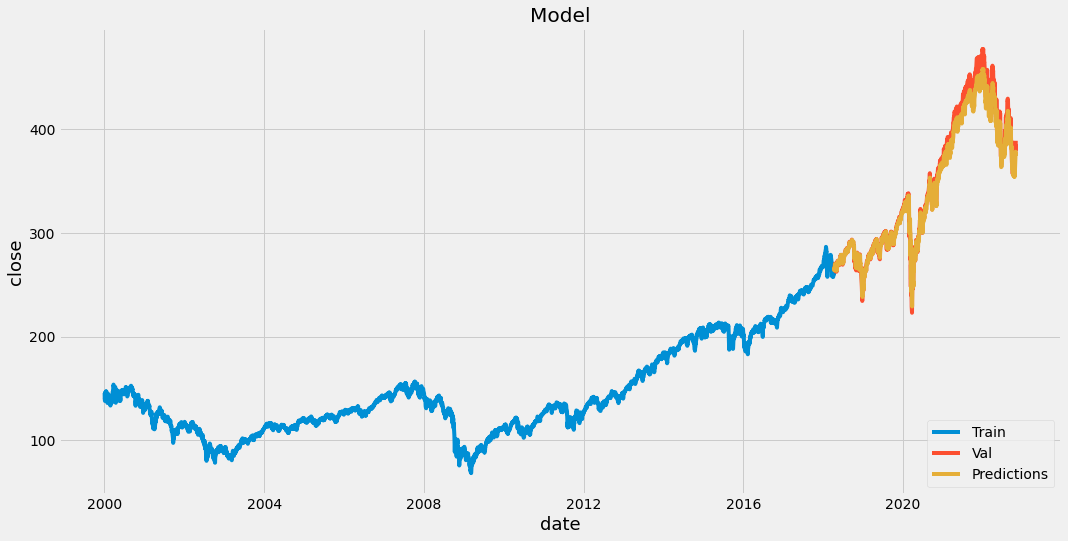

In [175]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date', fontsize = 18)
plt.ylabel('close', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [176]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-04-11,263.760010,265.383179
2018-04-12,265.929993,263.927307
2018-04-13,265.149994,266.290527
2018-04-16,267.329987,265.220612
2018-04-17,270.190002,267.545135
...,...,...
2022-10-24,378.869995,369.752686
2022-10-25,384.920013,372.743958
2022-10-26,382.019989,378.456512


In [177]:
Quote = ['MMM','ABT','ADM','ADBE','T','ADSK','COST','DAL','IBM','MCD','META','MRNA','NFLX']
for i in range(len(Quote)):
  EndDate = '2022-11-08'
  apple_quote = web.DataReader(Quote[i], data_source = 'yahoo', start = '2012-01-01', end = EndDate)
  new_df = apple_quote.filter(['Close'])
  last_60_days = new_df[-60:].values
  last_60_days_scaled = scaler.transform(last_60_days)
  X_test = []
  X_test.append(last_60_days_scaled)
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  pred_price = model.predict(X_test)
  pred_price = scaler.inverse_transform(pred_price)
  print("Prediction for " + Quote[i] + " on " + str(EndDate) + " close is " + str(pred_price[0,0]))


1/1 [==============================] - 0s 26ms/step
Prediction for MMM on 2022-11-08 close is 126.10739
1/1 [==============================] - 0s 30ms/step
Prediction for ABT on 2022-11-08 close is 101.218025
1/1 [==============================] - 0s 29ms/step
Prediction for ADM on 2022-11-08 close is 98.10662
1/1 [==============================] - 0s 27ms/step
Prediction for ADBE on 2022-11-08 close is 301.2846
1/1 [==============================] - 0s 26ms/step
Prediction for T on 2022-11-08 close is 25.838497
1/1 [==============================] - 0s 30ms/step
Prediction for ADSK on 2022-11-08 close is 200.25757
1/1 [==============================] - 0s 30ms/step
Prediction for COST on 2022-11-08 close is 470.15448
1/1 [==============================] - 0s 25ms/step
Prediction for DAL on 2022-11-08 close is 39.386906
1/1 [==============================] - 0s 28ms/step
Prediction for IBM on 2022-11-08 close is 140.15208
1/1 [==============================] - 0s 24ms/step
Prediction f

In [178]:
for i in range(len(Quote)):
  apple_quote2 = web.DataReader(Quote[i], data_source = 'yahoo', start = EndDate, end = EndDate)
  print(str(Quote[i]) + " " + str(apple_quote2['Close']))

MMM Date
2022-11-08    125.349998
Name: Close, dtype: float64
ABT Date
2022-11-08    99.639999
Name: Close, dtype: float64
ADM Date
2022-11-08    96.389999
Name: Close, dtype: float64
ADBE Date
2022-11-08    302.170013
Name: Close, dtype: float64
T Date
2022-11-08    18.57
Name: Close, dtype: float64
ADSK Date
2022-11-08    199.009995
Name: Close, dtype: float64
COST Date
2022-11-08    492.76001
Name: Close, dtype: float64
DAL Date
2022-11-08    33.59
Name: Close, dtype: float64
IBM Date
2022-11-08    140.039993
Name: Close, dtype: float64
MCD Date
2022-11-08    278.399994
Name: Close, dtype: float64
META Date
2022-11-08    96.470001
Name: Close, dtype: float64
MRNA Date
2022-11-08    164.610001
Name: Close, dtype: float64
NFLX Date
2022-11-08    263.459991
Name: Close, dtype: float64
